In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model

import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt


time: 2.49 s (started: 2021-05-25 22:00:07 +00:00)


In [ ]:
# from tensorflow.keras import mixed_precision

# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_global_policy(policy)

time: 833 µs (started: 2021-05-25 22:00:09 +00:00)


In [ ]:
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    data_dir = "/content/drive/MyDrive/Colab Notebooks/Datasets/TensorflowDatasets",
    split=['train[:80%]', 'train[80%:]', 'test'],
    
    with_info=True,
    as_supervised=True
)



time: 5.89 s (started: 2021-05-25 22:00:09 +00:00)


In [ ]:
print(ds_info)

tfds.core.DatasetInfo(
    name='emnist',
    version=3.0.0,
    description='The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset.

Note: Like the original EMNIST data, images provided here are inverted horizontally and rotated 90 anti-clockwise. You can use `tf.transpose` within `ds.map` to convert the images to a human-friendlier format.',
    homepage='https://www.nist.gov/itl/products-and-services/emnist-dataset',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=47),
    }),
    total_num_examples=131600,
    splits={
        'test': 18800,
        'train': 112800,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{cohen_afshar_tapson_schaik_2017,
        title={EMNIST: Extending MNIST to handwritten lette

In [ ]:
print(type(ds_train))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
time: 1.33 ms (started: 2021-05-25 22:00:15 +00:00)


In [ ]:
# get_label_name = ds_info.features['label'].int2str

# image, label = next(iter(ds_train))
# _ = plt.imshow(image)
# _ = plt.title(get_label_name(label))

time: 1.67 ms (started: 2021-05-25 22:00:15 +00:00)


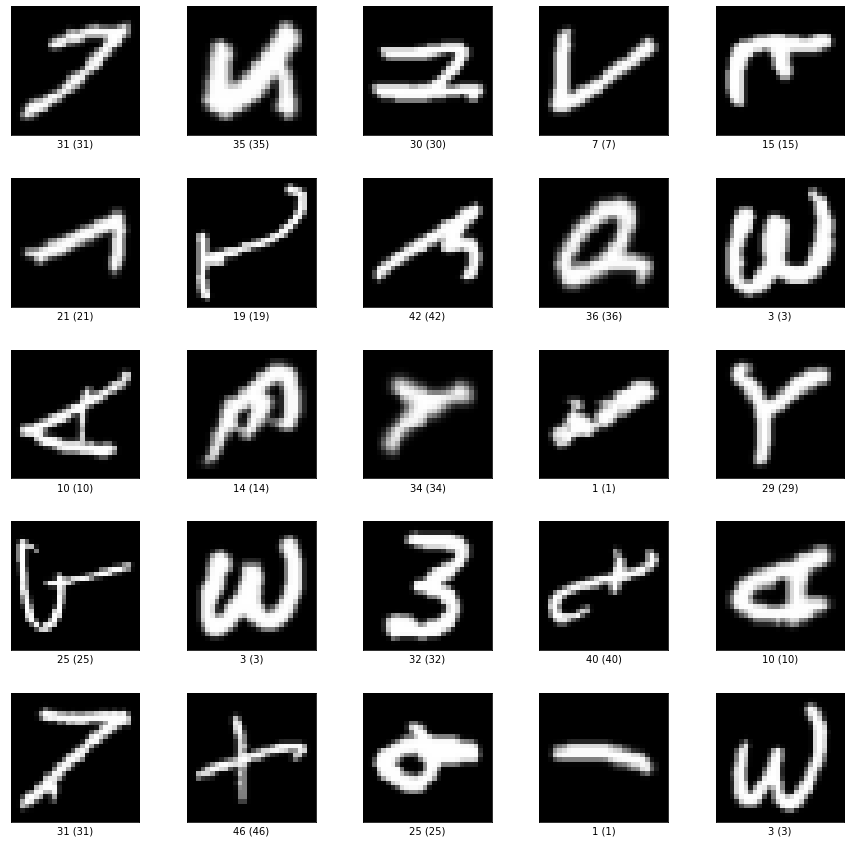

time: 2.2 s (started: 2021-05-25 22:00:15 +00:00)


In [ ]:
fig = tfds.show_examples(ds_train, ds_info, rows = 5, cols = 5)

In [ ]:
img_height = img_width = 32

print(img_height)
print(img_width)


AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 64







32
32
time: 3.79 ms (started: 2021-05-25 22:00:17 +00:00)


In [ ]:
def downscale_img(image, label):
  image = tf.image.resize(image, [img_height, img_width])
  # image = tf.reshape(-1,img_height*img_width)
  return image, label



ds_train = ds_train.map(downscale_img, num_parallel_calls=AUTOTUNE)
ds_val = ds_val.map(downscale_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.map(downscale_img, num_parallel_calls=AUTOTUNE)


time: 55.5 ms (started: 2021-05-25 22:00:17 +00:00)


In [ ]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

def configure_for_performance(ds):
    ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
    # ds = ds.cache("Cache")
    ds = ds.shuffle(buffer_size=256)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

# def configure_for_performance_2(ds):
#     ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
#     ds = ds.cache("Cache")
#     ds = ds.shuffle(buffer_size=256)
#     ds = ds.batch(BATCH_SIZE)
#     ds = ds.prefetch(buffer_size=AUTOTUNE)
#     return ds

def configure_for_performance_3(ds):
    ds = ds.map(normalize_img, num_parallel_calls = AUTOTUNE)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

time: 10.4 ms (started: 2021-05-25 22:00:17 +00:00)


In [ ]:
ds_train = configure_for_performance(ds_train)
ds_val = configure_for_performance_3(ds_val)
ds_test = configure_for_performance_3(ds_test)


time: 52.1 ms (started: 2021-05-25 22:00:17 +00:00)


In [ ]:
for image, label in ds_train.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

for image, label in ds_val.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())
    
for image, label in ds_test.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())


Image shape:  (64, 32, 32, 1)
Label:  [20 31  1  5 13 37 43  8 25 35 25  0  3  7 36 16 12 33 46  3  8 29 34  6
  1 21 29 31 29 22 10 22 34  5 31 36  3  2  5 41 23  7 23 25  3 16 19 27
  2 12 17 24 30 11 13 29 39 37 30 40 29 43 27 28]
Image shape:  (64, 32, 32, 1)
Label:  [ 8 37 23 18 23 29  9 23 30 39  5 35 17  9 34  7 29  4  7 35 44 22 24  0
 32  4 19 40 32 36  0  7  6 24  3 45 27 14 43 46  1 21 38  2 12 28 26  5
 34 45 43 45 20 26 16 38 16 23 11  5 42 38 26 30]
Image shape:  (64, 32, 32, 1)
Label:  [36 11 31 44 46 11  2 15 30 44 42 20 15 43 35 26 41 11 33 22 44 22 28 23
 11 33 27 16 25 42 41 17 32 31 28 24 16 46 32 32  6 10  7 22 35 29  5  1
 34 11  8 19 26 33 44 11  2  4  4 30  0 45 13 25]
time: 3.94 s (started: 2021-05-25 22:00:17 +00:00)


In [ ]:
num_classes = ds_info.features["label"].num_classes


# Creating model
model = tf.keras.applications.MobileNet(
    include_top=False, input_shape=(img_height, img_width, 1),
    classes=num_classes, weights=None) #, pooling='avg')


x = model.output

x = layers.GlobalAveragePooling2D()(x)

# output layer
predictions = layers.Dense(num_classes, activation="softmax")(x)

model = Model(inputs = model.input, outputs = predictions)
  
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        288       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 16, 16, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 16, 16, 32)        0     

In [ ]:
from tensorflow.keras.optimizers import Adamax

# Model compilation
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adamax(0.0001),
              metrics=['accuracy'])


# Training model
model_history = model.fit(ds_train,
                          epochs=30,
                          validation_data=ds_val,
                          verbose=1)


path = '/content/drive/MyDrive/Colab Notebooks/Notebooks/Models/MobileNet_EMNIST_Balanced_Base/'
model.save(path)

Epoch 1/30
1410/1410 [==============================] - 48s 21ms/step - loss: 3.7905 - accuracy: 0.0572 - val_loss: 3.5124 - val_accuracy: 0.0956
Epoch 2/30
1410/1410 [==============================] - 29s 21ms/step - loss: 3.1118 - accuracy: 0.1623 - val_loss: 2.7467 - val_accuracy: 0.2293
Epoch 3/30
1410/1410 [==============================] - 31s 22ms/step - loss: 2.3537 - accuracy: 0.3165 - val_loss: 2.0239 - val_accuracy: 0.3970
Epoch 4/30
1410/1410 [==============================] - 32s 22ms/step - loss: 1.7297 - accuracy: 0.4753 - val_loss: 1.5044 - val_accuracy: 0.5372
Epoch 5/30
1410/1410 [==============================] - 29s 21ms/step - loss: 1.2981 - accuracy: 0.5936 - val_loss: 1.1818 - val_accuracy: 0.6255
Epoch 6/30
1410/1410 [==============================] - 30s 21ms/step - loss: 1.0180 - accuracy: 0.6747 - val_loss: 0.9822 - val_accuracy: 0.6849
Epoch 7/30
1410/1410 [==============================] - 29s 21ms/step - loss: 0.8297 - accuracy: 0.7306 - val_loss: 0.8735 -

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Notebooks/Models/MobileNet_EMNIST_Balanced_Base/assets


time: 17min 45s (started: 2021-05-25 22:00:22 +00:00)


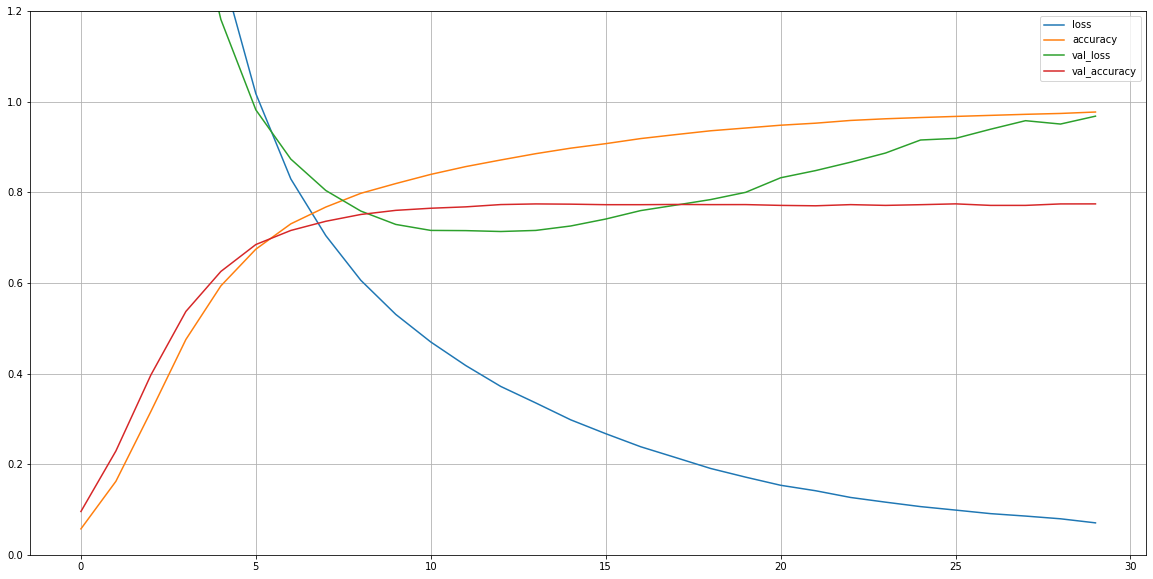

time: 440 ms (started: 2021-05-25 22:18:08 +00:00)


In [ ]:
img_path = path + 'Graph'

pd.DataFrame(model_history.history).plot(figsize=(20, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.savefig(img_path)
plt.show()

In [ ]:
loss_value, acc = model.evaluate(ds_test)

print(f"Test Accuracy: {(acc*100):.3f}%")
print(f"Loss: {loss_value:.3f}%")

294/294 [==============================] - 3s 11ms/step - loss: 0.9990 - accuracy: 0.7707
Test Accuracy: 77.074%
Loss: 0.999%
time: 5.18 s (started: 2021-05-25 22:18:08 +00:00)
